### Import Libraries

In [1]:
import sys

sys.path.append('..')

In [18]:
import utils.data
import utils.trans
import utils.extract
import utils.visualize
import utils.features

In [19]:
from importlib import reload

In [20]:
reload(utils.data)
reload(utils.trans)
reload(utils.extract)
reload(utils.visualize)
reload(utils.features)

<module 'utils.features' from '..\\utils\\features.py'>

### Load Data

In [21]:
# file_dir = "..\\..\\datasets\\audio\\audio_speech_actors\\Actor_01"
# file_name = "03-01-01-01-01-01-01.wav"

file_dir = "..\\data\\self_recordings"
file_name = 'queen.wav'

file_path = file_dir + "\\" + file_name

In [22]:
x = {}

In [23]:
x['wave'] = utils.data.load_wave(file_path)

### Frequency Transforms

In [24]:
x['stft'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_stft, 
    func_params=utils.extract.params['stft'])

x['mel'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_mel, 
    func_params=utils.extract.params['mel'])

x['cqt'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_cqt, 
    func_params=utils.extract.params['cqt'])

x['features'] = utils.features.signal_features(x)

In [25]:
type(x['features'])

numpy.ndarray

In [26]:
utils.visualize.display_shapes(x)   

x:
--wave:
  --s: (440320,)
  --t: (440320,)
--stft:
  --s: (2049, 1721)
  --c: (300, 1721)
  --f_phase: (2049, 1721)
  --f: (2049,)
  --t: (1721,)
--mel:
  --s: (256, 1721)
  --c: (256, 1721)
  --f: (256,)
  --t: (1721,)
--cqt:
  --s: (384, 1721)
  --c: (300, 1721)
  --f_phase: (384, 1721)
  --f: (384,)
  --t: (1721,)
--features: (53, 1721)


### View Example

In [27]:
reload(utils.visualize)

<module 'utils.visualize' from '..\\utils\\visualize.py'>

In [28]:
figsize = (15, 1.5)
# figsize = (15, 5)
cmap_spec = 'magma'

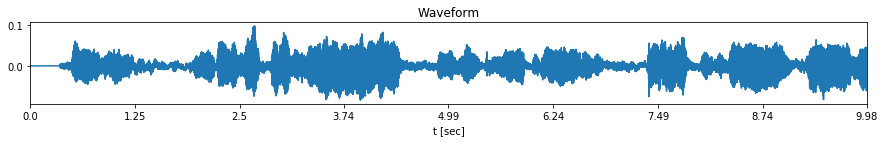

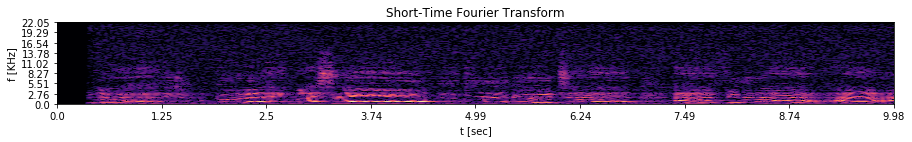

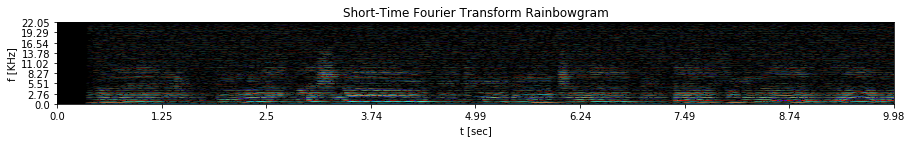

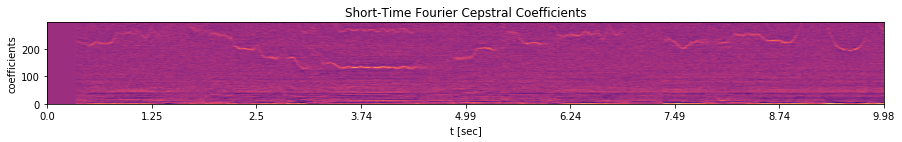

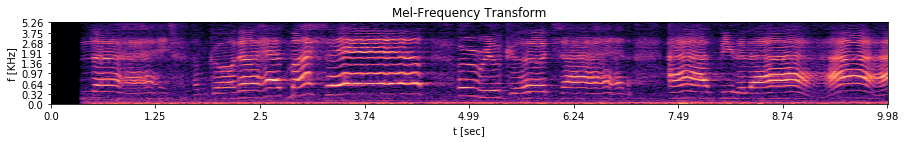

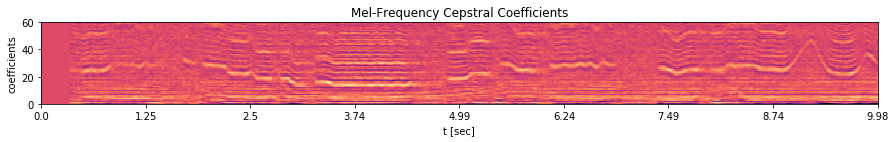

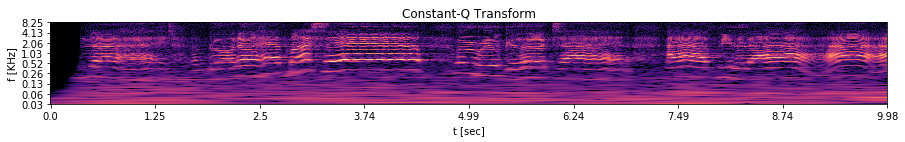

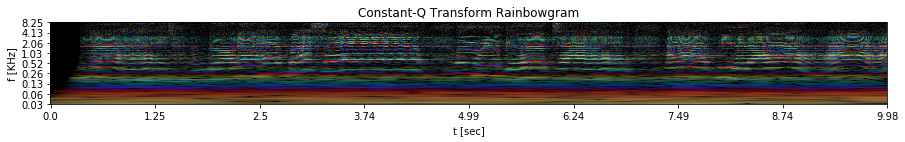

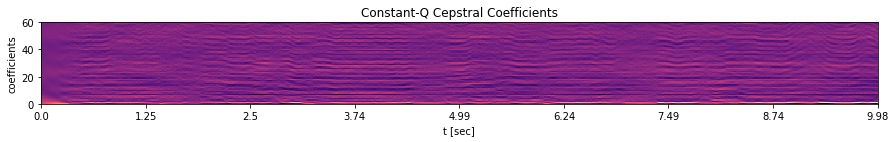

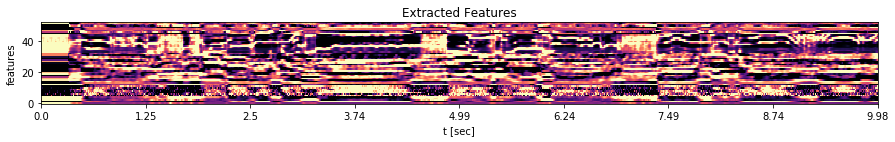

In [29]:
utils.visualize.display_all(x, figsize=figsize, cmap_spec=cmap_spec, 
                            display_rainbowgrams=True,
                            display_cepstrum=True)

### CQT

In [30]:
import matplotlib.pyplot as plt
from IPython.display import Audio

In [31]:
import librosa
import numpy as np
import scipy

In [32]:
reload(utils.features)

<module 'utils.features' from '..\\utils\\features.py'>

In [33]:
f_s = utils.extract.f_s

In [34]:
utils.extract.params['cqt']

{'f_s': 44100,
 'n_bins': 384,
 'hop_length': 256,
 'fmin': 32.70319566257483,
 'bins_per_octave': 48,
 'filter_scale': 1}

In [35]:
n_bins = utils.extract.params['cqt']['n_bins']
hop_length = utils.extract.params['cqt']['hop_length']
fmin = utils.extract.params['cqt']['fmin']
bins_per_octave = utils.extract.params['cqt']['bins_per_octave']
filter_scale = utils.extract.params['cqt']['filter_scale']

In [36]:
basis, lengths = librosa.filters.constant_q(
    f_s, 
    fmin=fmin,
    n_bins=n_bins,
    bins_per_octave=bins_per_octave,
    filter_scale=filter_scale)

In [41]:
f_s

44100

In [37]:
F = np.abs(np.fft.fftn(basis, axes=[-1]))
# Keep only the positive frequencies
F = F[:, :(1 + F.shape[1] // 2)]

In [40]:
F.shape

(384, 65537)

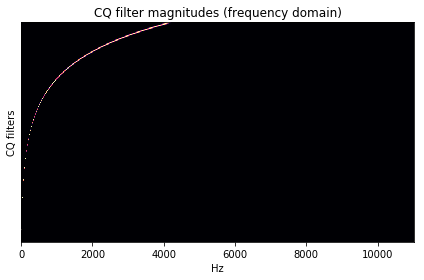

In [39]:
librosa.display.specshow(F, x_axis='linear')
# plt.yticks(np.arange(len(notes))[::12], notes[::12])
plt.ylabel('CQ filters')
plt.title('CQ filter magnitudes (frequency domain)')
plt.tight_layout()
plt.show()